In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools
import cv2
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
    class_names = ['buildings', 'forest','glacier','mountain','sea','street']
    class_labels = {'buildings': 0, 'forest': 1, 'glacier' :2, 'mountain': 3, 'sea': 4, 'street': 5 }

In [3]:
def load_dataset(data_dir):
    images = []
    labels = []
    for class_name in class_names:
            path = os.path.join(data_dir,class_name)
            for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array,(50,50))
                images.append(img_array)
                labels.append(class_labels[class_name])
    
    images, labels = shuffle(images,labels)
    images = np.array(images)
    labels = np.array(labels)
    
    return (images,labels)

In [4]:
(X_train,Y_train) = load_dataset('intel_image_classification/seg_train')
(X_test,Y_test) = load_dataset('intel_image_classification/seg_test')

print('number of training images = '+ str(Y_train.shape[0]))
print('number of test images = '+ str(Y_test.shape[0]))

number of training images = 14034
number of test images = 3000


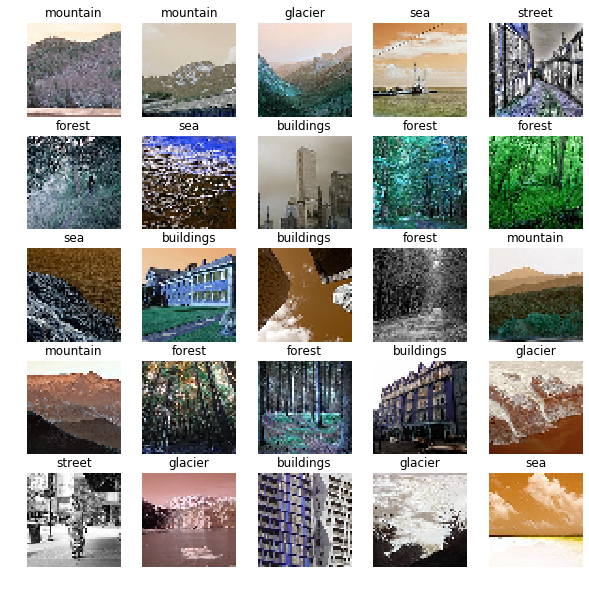

In [5]:
fig,ax = plt.subplots(5,5,figsize = (10,10))
for i in range(5):
    for j in range(5):
        index = np.random.randint(X_train.shape[0])
        ax[i][j].imshow(X_train[index])
        ax[i][j].axis('off')
        ax[i][j].set_title(class_names[Y_train[index]])

In [6]:
X_train = X_train/255.0
X_test = X_test /255.0


In [7]:
model = Sequential()
model.add(Conv2D(200,(3,3),activation = 'relu', input_shape = (50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(150,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(150,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(70,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation = 'softmax'))
model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 150)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18150)             0         
_________________________________________________________________
dense (Dense)        

In [8]:
trained_model = model.fit(X_train,Y_train, batch_size= 32,epochs=10, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 667s 59ms/sample - loss: 1.2682 - acc: 0.5065 - val_loss: 0.9822 - val_acc: 0.6113
Epoch 2/10
11227/11227 [==============================] - 613s 55ms/sample - loss: 1.0043 - acc: 0.6233 - val_loss: 0.8375 - val_acc: 0.6893
Epoch 3/10
11227/11227 [==============================] - 585s 52ms/sample - loss: 0.8340 - acc: 0.7048 - val_loss: 0.7185 - val_acc: 0.7317
Epoch 4/10
11227/11227 [==============================] - 621s 55ms/sample - loss: 0.7186 - acc: 0.7575 - val_loss: 0.7012 - val_acc: 0.7382
Epoch 5/10
11227/11227 [==============================] - 591s 53ms/sample - loss: 0.6186 - acc: 0.7990 - val_loss: 0.6365 - val_acc: 0.7756
Epoch 6/10
11227/11227 [==============================] - 607s 54ms/sample - loss: 0.5190 - acc: 0.8313 - val_loss: 0.6707 - val_acc: 0.7741
Epoch 7/10
11227/11227 [==============================] - 672s 60ms/sample - loss: 0.4432 - acc: 0.8607 -

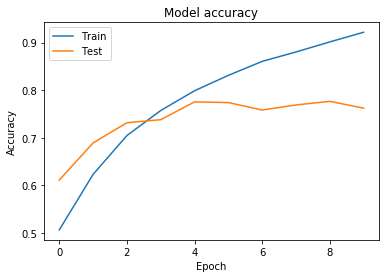

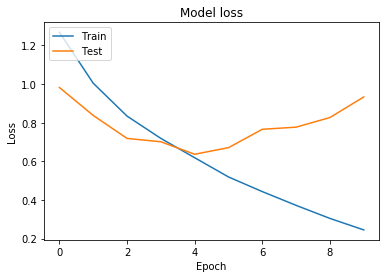

In [9]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test,Y_test,verbose = 1)

3000/3000 [==============================] - 61s 20ms/sample - loss: 0.9189 - acc: 0.7593


[0.9188576998710632, 0.7593333]

In [11]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [12]:
Y_predict = model.predict(X_test)

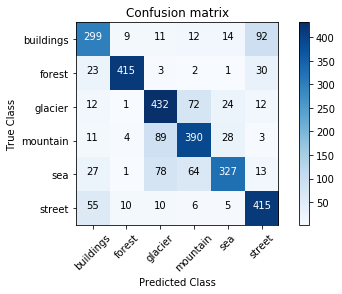

In [13]:
cnf_matrix = confusion_matrix(Y_test,np.argmax(Y_predict, axis = 1))
plot_confusion_matrix(cnf_matrix,class_names)